## Introduction
Image classification is a technique in the field of computer vision that classifies images into pre-defined categories. The machine learning model looks for specific features in an image such as wheels, edges,..and use these learned features to categorise the object in the image. Once the model is trained on large datasets of images,  and learns the features, it can predict the category of new images.
Image classification is used in many diverse applications such as:
1. Object detection
2. Medical image analysis
3. Image search engines
4. Facial recognition

In this lab, we will classify *CIFAR-10* images data. The *CIFAR-10* dataset consists of 60000 32x32 colour images, 50000 are training images and 10000 are test images. Then, we will integrate our model to *weights and biases* MLOPS platform to add experiments' tracking to the machine learning pipeline.

*Weights and biases* plaform provides developers with lighweight tools to quickly track their machine learning training experiments, evaluate model performance, reproduce models, and visualize results in the form of regressions. It also has functions to share findings with the team mates.


## Objectives
The main objectives of this Jupyter notebook are:

* To learn how to build a classification application using Keras library.
* To learn how to integrate the classification application to *weights and biases* MLOPS platform.
* To observe and analyze the visualization and results of a machine learning experiment.


## Tools and Libraries
For this Jupyter notebook, we will need the following tools and libraries:

1. Python 3.x
2. Access to colab by Google
3. Tensorflow deep learning library
4. Keras library to construct neural network algorithm
4. Numpy library for mathematical operations
5. Matplotlib library for data visualization

## Data
We will be using the *CIFAR-10* dataset. This dataset contains 60000 coloured images from 10 different categories ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'). Read more about this dataset here https://www.cs.toronto.edu/~kriz/cifar.html.

# Part - I Image classification using Keras

## 1. Importing Libraries
Let's start by importing the necessary libraries.

In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras import Sequential
from keras.layers import Flatten, Dense

## 2. Loading the CIFAR-10 dataset

Load the dataset using keras library.

In [2]:
cifar10 = cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Define an array of the existing classes in CIFAR-10

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

## 3. Data Exploration and Visualization

#### Checking unique values per class in train and test sets

In [4]:
print('train set dimensions ', train_images.shape)
print('train set labels', train_labels) #Each Label is between 0-9
print('-------------------')
print('test set dimensions',test_images.shape)

train set dimensions  (50000, 32, 32, 3)
train set labels [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
-------------------
test set dimensions (10000, 32, 32, 3)


In [5]:
print ('Unique classes in the CIFAR-10 train set', np. unique(train_labels))
print ('Frequency of unique classes in CIFAR-10 train set', np. unique(train_labels, return_counts=True))

Unique classes in the CIFAR-10 train set [0 1 2 3 4 5 6 7 8 9]
Frequency of unique classes in CIFAR-10 train set (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))


In [6]:
print ('Unique classes in the CIFAR-10 test set', np. unique(test_labels))
print ('Frequency of unique classes in CIFAR-10 test set', np. unique(test_labels, return_counts=True))

Unique classes in the CIFAR-10 test set [0 1 2 3 4 5 6 7 8 9]
Frequency of unique classes in CIFAR-10 test set (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


#### Plotting sample image from train set
Inspect the first image in the train set, you will notice that the pixel values fall in the range of 0 to 255.

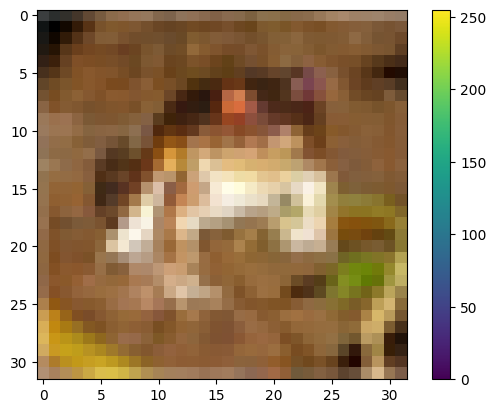

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

This image is a frog.

Scaling the images between 0–1 to feed it into the Neural Network

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

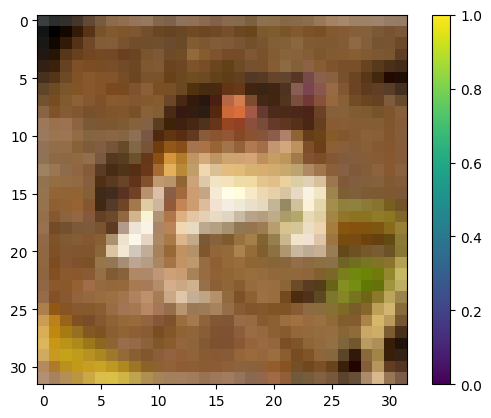

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## 5. Neural Network building & application
Now that we have understood the data, we can build a simple neural network to classify the images.

In [10]:
model = Sequential([
    Flatten() #To make the 32x32x3 image into a single line of number,
    Dense(128, activation=tf.nn.relu) #Relu is used to get non-linear patterns,
    Dense(10, activation=tf.nn.softmax)
])

We first apply a multi-layer perceptron.But we will see that it has a poor efficiency. This is why later we will use CNN.

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.2741 - loss: 2.0517
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3652 - loss: 1.7826
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3872 - loss: 1.7059
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4013 - loss: 1.6753
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4065 - loss: 1.6556
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4097 - loss: 1.6391
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4205 - loss: 1.6301
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4201 - loss: 1.6221
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4221 - loss: 1.6099
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4282 - loss: 1.6062


In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4269 - loss: 1.6097
Test accuracy: 0.42239999771118164


In [15]:
predictions = model.predict(test_images)
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([0.06501118, 0.03288034, 0.09959094, 0.29781318, 0.05618266,
       0.18201517, 0.13434958, 0.01818675, 0.0785788 , 0.03539129],
      dtype=float32)

In [17]:
print ('The position of the highest probability of all classes ',np.argmax(predictions[0]))
print ('The model is confident it is a ', class_names[3])

The position of the highest probability of all classes  3
The model is confident it is a  cat


Lets compare the predicted label by the model with the true label of the image in the test set.

In [18]:
print ('The true label of the image is', test_labels[0])
print ('The image is actually an', class_names[3])

The true label of the image is [3]
The image is actually an cat


Lets compare the `predicted_label` with the `true_label` of the first image in the test set.

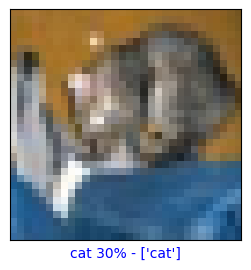

In [19]:
def plot_image(position, predictions, true_label, dataset):
  predictions, true_label, image = predictions[position], true_label[position], dataset[position]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'orange'
  plt.xlabel("{} {:2.0f}% - {}".format(class_names[predicted_label],
                                100*np.max(predictions),
                               np.array(class_names)[true_label.astype(int)]),
                                color=color)
position = 0
plt.figure(figsize=(6,3))
plot_image(position, predictions, test_labels, test_images)
plt.show()

# Part - II Image classification using Keras integrated with weights and biases (MLOPS platform)

## Connect your code to weights and biases (wandb)
Step-by-step guide to installation

## 1. Installl w&b library
Start by installing the library and logging in to your free account. If this is your first time logging to wandb or you are not logged in, the link that appears after `wandb.login()` will take you to sign-up/login page so you can create an account.
If you're prompted to authenticate yourself, you need to copy the key from your w&b profile.

First, install the python library to interact with the Weights and Biases API

In [21]:
!pip install -qU wandb

First time users, login and provide your API key when prompted. Copy the key by double-clicking on it in the pop-up page.

In [23]:
import wandb
from wandb.integration.keras import WandbMetricsLogger, WandbModelCheckpoint, WandbEvalCallback

wandb.login(key="API_Key")

print('Now you are connected to W&B and you will be able to visualize your project runs there')

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: hippolyte-valentin (hippolyte-valentin-mines-saint-etienne-alumni) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Now you are connected to W&B and you will be able to visualize your project runs there


## 2. Importing Libraries

In [24]:
!pip install tensorflow_datasets

In [25]:
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10
import tensorflow_datasets as tfds

## 3. Loading the CIFAR-10 dataset

In [32]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train[::] / 255., x_test / 255.  #We use slicing by 5 to reduce the size of the training time.
y_train = y_train[::]

CLASS_NAMES = ["airplane", "automobile", "bird", "cat",
               "deer", "dog", "frog", "horse", "ship", "truck"]


print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (50000, 32, 32, 3)
Shape of y_train:  (50000, 1)
Shape of x_test:  (10000, 32, 32, 3)
Shape of y_test:  (10000, 1)


## 4. Neural Network Development & Application

Build the Neural Network model.

In [33]:
def Model():
  inputs = keras.layers.Input(shape=(32, 32, 3))

  x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
  x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
  x = keras.layers.MaxPooling2D(pool_size=2)(x)

  x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
  x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)

  x = keras.layers.GlobalAveragePooling2D()(x)

  x = keras.layers.Dense(128, activation='relu')(x)
  x = keras.layers.Dense(32, activation='relu')(x)

  outputs = keras.layers.Dense(len(CLASS_NAMES), activation='softmax')(x)

  return keras.models.Model(inputs=inputs, outputs=outputs)

Initialize the hyperparameters and metadata using `wandb.init()`. Initialise the model parameters in `wandb.config`.

In [36]:
run = wandb.init(project='image classification project',
                 config={
                     "learning_rate": 0.005,
                     "epochs": 10,
                     "batch_size": 1024,
                     "loss_function": "sparse_categorical_crossentropy",
                     "architecture": "CNN",
                     "dataset": "CIFAR-10"
                 })
config = wandb.config

tf.keras.backend.clear_session()
model = Model()
model.summary()

optimizer = tf.keras.optimizers.Adam(config.learning_rate)
model.compile(optimizer, config.loss_function, metrics=['acc'])

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,322 (145.79 KB)

 Trainable params: 37,322 (145.79 KB)

 Non-trainable params: 0 (0.00 B)

Add WandbMetricsLogger to log metrics and WandbModelCheckpoint to log model checkpoints

In [37]:
wandb_callbacks = [
    WandbMetricsLogger(),
    WandbModelCheckpoint(
    filepath="my_model_{epoch:02d}.keras",
    monitor="val_loss",  # or another metric you wish to monitor
    verbose=1,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    initial_value_threshold=None
),
]

model.fit(x_train, y_train,
          epochs=config.epochs,
          batch_size=config.batch_size,
          validation_data=(x_test, y_test),
          callbacks=wandb_callbacks)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.1314 - loss: 2.2503
Epoch 1: saving model to my_model_01.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - acc: 0.1321 - loss: 2.2487 - val_acc: 0.2328 - val_loss: 2.0063
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.2405 - loss: 1.9781
Epoch 2: saving model to my_model_02.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - acc: 0.2408 - loss: 1.9773 - val_acc: 0.2924 - val_loss: 1.8558
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.2826 - loss: 1.8968
Epoch 3: saving model to my_model_03.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - acc: 0.2821 - loss: 1.8983 - val_acc: 0.2806 - val_loss: 1.8851
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.3028 - loss: 1.8277
Epoch 4: saving model to my_model_04.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - acc: 0.3031 - loss: 1.8269 - val_acc: 0.3624 - val_loss: 1.6933
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - acc: 0.3567 - loss: 1.7054
Epoch 5: saving mo

Use wandb.log for custom metrics. In this example we log the error rate in the test set.

In [38]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test Error Rate: ', round((1 - accuracy) * 100, 2))

wandb.log({'Test Error Rate': round((1 - accuracy) * 100, 2)})

run.finish()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - acc: 0.4815 - loss: 1.4229
Test Error Rate:  52.34


Test Error Rate,▁
epoch/acc,▁▃▃▄▅▆▇▇██
epoch/epoch,▁▂▃▃▄▅▆▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▆▆▄▄▃▂▂▁▁
epoch/val_acc,▁▃▂▅▅▆▇███
epoch/val_loss,█▆▇▄▄▃▂▁▁▁
Test Error Rate,52.34
epoch/acc,0.48108
epoch/epoch,9
epoch/learning_rate,0.005


## Explore wandb embedded tools

**Purpose:** Utilize the tools provided by wandb for in-depth analysis, result sharing, and documentation.

**Instructions:**

1. Log in to your wandb profile, navigate to the project, and select the latest run.

2. Review the visualizations available in the workspace tab to understand the performance of the model.

3. Use the  `Create Report` tool on the most recent run's page to generate a report, including charts, system panels, and epochs panels.

4. Examine the results displayed in the regression charts, and analyze the findings within the report.

5. Test the options of `Smoothing` and `ignore outliers` in the Runs tab and write a brief analysis.